In [91]:
from random import randint
import numpy as np
import decimal
from sklearn import metrics
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [114]:
def openreadtxt(file_name):
    data = []
    file = open(file_name,'r')  #打开文件
    file_data = file.readlines() #读取所有行
    for row in file_data:
        tmp_list = row.split(' ') #按‘，’切分每行的数据
        tmp_list[-1] = tmp_list[-1].replace('\n','') #去掉换行符
        for i in range(len(tmp_list)): #将字符串转化为浮点数
            tmp_list[i] = float(tmp_list[i])
        data.append(tmp_list) #将每行数据插入data中
    return data

def pred(x, w):
    pred_y = 0
    for i in range(len(w)):
        if(i == len(w)-1): #w[i]是偏置
            pred_y += w[i]
        else:
            pred_y += (x[i] * w[i])
        #print(pred_y)
        #pred_y = sigmoid(pred_y)
    return pred_y

def SGD(Y, X, w, alpha):
    '''
    w: 参数 
    alpha: 学习率
    '''
    i = randint(0,len(Y)-1)
    for j in range(len(w)):
        if( j == len(w) - 1 ):
            w[j] = w[j] + alpha * (Y[i] - sigmoid(pred(X[i],w)))
        else:
            w[j] = w[j] + alpha * (Y[i] - sigmoid(pred(X[i],w))) * X[i][j]
            
def GD(Y, X, w, alpha):
    sum0 = 0
    sum1 = 0
    sum2 = 0
    sum3 = 0
    sum4 = 0
    sum5 = 0
    sum6 = 0
    for i in range(len(X)): 
        y_pred = pred(X[i],w)
        sum0 += (Y[i] - y_pred) * X[i][0]
        sum1 += (Y[i] - y_pred) * X[i][1]
        sum2 += (Y[i] - y_pred) * X[i][2]
        sum3 += (Y[i] - y_pred) * X[i][3]
        sum4 += (Y[i] - y_pred) * X[i][4]
        sum5 += (Y[i] - y_pred) * X[i][5]
        sum6 += (Y[i] - y_pred)
    w[0] += alpha * (sum0 )
    w[1] += alpha * (sum1 )
    w[2] += alpha * (sum2 )
    w[3] += alpha * (sum3 )
    w[4] += alpha * (sum4 )
    w[5] += alpha * (sum5 )
    w[6] += alpha * (sum6 )
    
        
def MSE(Y_pred, Y):
    MSE = 0
    #for i in range(len(Y)):
    #    #print(round((Y_pred[i] - Y[i]),2))
    #    tmp = pow((Y_pred[i] - Y[i]),2)
    #    MSE += tmp
        #print(MSE)
    #MSE = MSE/len(Y)
    MSE = metrics.mean_squared_error(np.array(Y), np.array(Y_pred))
    return MSE

def L(X, Y, w):
    l = 0;
    for i in range(len(Y)):
        l += Y[i]*pred(X[i],w) - math.log(1 + np.exp(pred(X[i],w)))
    l = l / len(Y)
    return l
    
    
def pred_Y(X,w):
    Y_pred = []
    for i in range(len(X)):
        y = pred(X[i],w)
        y = sigmoid(y)
        Y_pred.append(y)
    return Y_pred

def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def error(y_pred,y):
    sum = 0
    for i in range(len(y_pred)):
        tmp = 0
        if(y_pred[i] > 0.5):
            tmp = 1 
        sum += abs(tmp - y[i])
    return sum / len(y)

In [102]:
#读取数据
data_train = openreadtxt('dataForTrainingLogistic.txt')
data_test = openreadtxt('dataForTestingLogistic.txt')
#print(data_train)
#划分数据
X_train = []
Y_train = []
X_test = []
Y_test = []
for d in data_train:
    x = []
    x.append(d[0])
    x.append(d[1])
    x.append(d[2])
    x.append(d[3])
    x.append(d[4])
    x.append(d[5])
    X_train.append(x)
    Y_train.append(d[6])



for d in data_test:
    x = []
    x.append(d[0])
    x.append(d[1])
    x.append(d[2])
    x.append(d[3])
    x.append(d[4])
    x.append(d[5])
    X_test.append(x)
    Y_test.append(d[6])


In [125]:
#（f）
#初始化参数
w = [1.0,1.0,1.0,1.0,1.0,1.0,1.0]
training_times = 50
alpha = 0.02
E_train = []
E_test = []
xx = []
K = []
print(type(Y_train[0]))
for j in range(40):
    k = 10 *(j+1)
    K.append(k)
    if( j < 39):
        X_test_k, X_train_k = train_test_split(X_train, test_size= (k/400) , random_state=42)
        Y_test_k, Y_train_k = train_test_split(Y_train, test_size= (k/400) , random_state=42)
    else:
        X_train_k = X_train
        Y_train = Y_train
    #print(len(X_train_k))
    for i in range(training_times):
        SGD(Y_train_k, X_train_k, w, alpha)
    train_pred = pred_Y(X_train,w)
    e = error(train_pred, Y_train)
    E_train.append(e)
    test_pred = pred_Y(X_test,w)
    e = error(test_pred,Y_test)
    E_test.append(e)

<class 'float'>


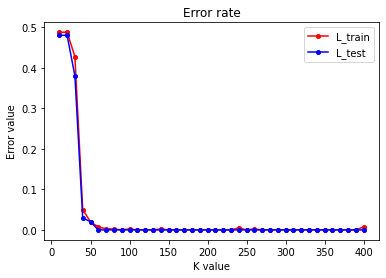

In [127]:
#(f)
plt.plot(K, E_train,color = 'red',marker='o',markersize=4, label='L_train')
plt.plot(K, E_test, color = 'blue',marker='o',markersize=4, label= 'L_test')
plt.xlabel('K value')
plt.ylabel('Error value')
plt.legend()
plt.title("Error rate")
plt.savefig('2_f_MSE3.png')

In [103]:
#初始化参数
w = [1.0,1.0,1.0,1.0,1.0,1.0,1.0]
training_times = 800001
alpha = 0.02
L_train = []
L_test = []
xx = []
print(type(Y_train[0]))
for i in range(training_times):
    if (i% 80000 == 0 and i > 0):
        xx.append(i)
        print(i)
        print(w)
        train_pred = pred_Y(X_train,w)
        l = L(X_train,Y_train,w)
        L_train.append(l)
        test_pred = pred_Y(X_test,w)
        l = L(X_test,Y_test,w)
        L_test.append(l)
    SGD(Y_train, X_train, w, alpha)

<class 'float'>
80000
[-5.1762613660269645, 7.689458584147679, -5.271918884212417, 7.033504732436913, -3.9539220377078728, 0.24612452141824726, 0.7270374412967873]
160000
[-6.083154192323228, 9.111998476597332, -6.2214448791494625, 8.130465143275982, -4.518095529399847, 0.19017934857968932, 0.8612411169476523]
240000
[-6.643805660220065, 10.075465197468125, -6.862502630149573, 8.86234647061693, -4.828626903976234, 0.15385153820076072, 0.9455475864145576]
320000
[-7.075613285199171, 10.78588538928935, -7.377729591222791, 9.369792809714449, -5.074575661355577, 0.14988627147127284, 0.9719669529682741]
400000
[-7.424556271113279, 11.364080244911493, -7.781601114701265, 9.772899849636064, -5.254870669675948, 0.10305216776086297, 0.9941645667819432]
480000
[-7.699592172524109, 11.866359154203044, -8.108793747347233, 10.121335628629678, -5.375938640907865, 0.11070959144515811, 1.0417967500769936]
560000
[-7.955342592703374, 12.295185714998857, -8.405502868554146, 10.405412169011159, -5.504382

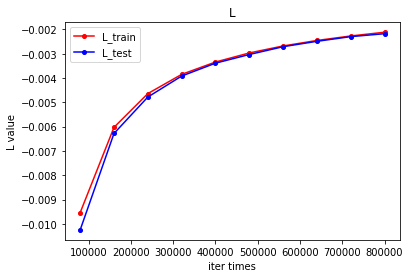

In [89]:
plt.plot(xx, L_train,color = 'red',marker='o',markersize=4, label='L_train')
plt.plot(xx, L_test, color = 'blue',marker='o',markersize=4, label= 'L_test')
plt.xlabel('iter times')
plt.ylabel('L value')
plt.legend()
plt.title("L")
plt.savefig('2_e_MSE3.png')

In [83]:
#在测试集上统计结果
test_pred = pred_Y(X_test,w)
sum = 0
for i in range(len(test_pred)):
    tmp = 0
    if(test_pred[i] > 0.5):
        tmp = 1 
    sum += abs(tmp - Y_test[i])
print(sum)

0.0


39.0
